Data loading

PROJECT TITLE 

# OVERVIEW
This project entails analysis of aviation accidents data from 1962 up to 2023. The purpose of the analysis is to determine which aircraft is the lowest risk for the 

In [121]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [37]:
plt.style.use('Solarize_Light2')

In [181]:
df = pd.read_csv('Data/AviationData.csv', encoding='latin1', low_memory=False)




In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


data understanding 

In [4]:
df.shape

(88889, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

####descriptionof the data;Do the data types line up with what we expect? Are there any missing values?
The data has 88889 rows and 31 columns, most of the data types are objects with some as float. 
There are rows that contain missing values 

In [19]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [24]:
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [17]:
df['Injury.Severity'].isna().sum()

1000

In [20]:
df['Event.Date'].head()

0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
Name: Event.Date, dtype: object

In [21]:
pd.to_datetime(df['Event.Date'].head())

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Event.Date, dtype: datetime64[ns]

In [ ]:
#df.loc[df['FAR.Description'] == 'Part 91: General Aviation']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,32.557222,-97.485555,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,03-12-2008
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,34.688611,-87.92,NaN,NaN,...,Other Work Use,NaN,3.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,15-01-2009
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,20-06-2014
63910,20080129X00122,Accident,CHI08CA057,2007-12-30,"ALEXANDRIA, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,28-02-2008


Data cleaning required to answer first question
What are the potential risk of aircraft *business?
1 aircraft damage and severity for the top 5 aircraft makes
To answer this question, we'll need the  aircraft damage and make  columns.


In [27]:
df['Make'].value_counts()

Cessna                     22227
Piper                      12029
CESSNA                      4922
Beech                       4330
PIPER                       2841
                           ...  
AEROTECHNIK                    1
Sargent                        1
Geddes                         1
Mccaa                          1
North American Rockwell        1
Name: Make, Length: 8237, dtype: int64

It appears Cessna manufactures are the most common airlines used. We'll now look at the top 5 brands' accidents frequency and aircraft damage damage.

In [31]:
top_airlines=df['Make'].value_counts(sort=True).head().index.tolist()

In [32]:
top_airlines

['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER']

In [47]:
df[df['Make'].isin(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER'])]['Aircraft.damage'].value_counts()


Substantial    35107
Destroyed      10030
Minor            734
Unknown           53
Name: Aircraft.damage, dtype: int64

In [99]:
#look at the trend of flights kwanza using date 

In [53]:
damage_counts= df[df['Make'].isin(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER'])]['Aircraft.damage'].value_counts()

In [54]:
damage_counts

Substantial    35107
Destroyed      10030
Minor            734
Unknown           53
Name: Aircraft.damage, dtype: int64

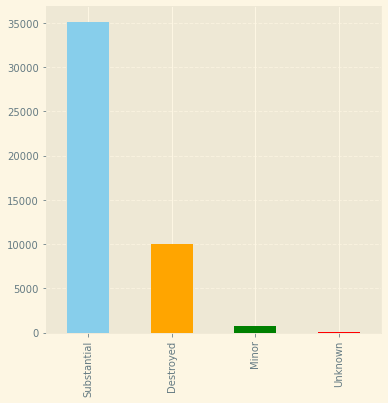

In [57]:
plt.figure(figsize=(6,6))
damage_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title= 'top airlines aircraft damage'
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7);

that answers accidents' severity

In [73]:
make_damage=df.loc[df['Make'].isin(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER']), ['Aircraft.damage']]
make_damage


,Aircraft.damage
1,Destroyed
2,Destroyed
4,Destroyed
6,Destroyed
7,Substantial
...,...
88880,NaN
88881,NaN
88884,NaN
88887,NaN


In [ ]:
top_airlines_= df.loc[df['Make'].isin(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER'])]
top_airlines_

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
##aircarft damage as per each brand make 

In [79]:
df_copy=pd.concat([make_damage, top_airlines_])
df_copy

,Aircraft.damage,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,Destroyed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Destroyed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Destroyed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Destroyed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Substantial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88880,NaN,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,NaN,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88884,NaN,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88887,NaN,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [81]:
df_copy= df_copy[['Aircraft.damage','Make']]
df_copy

,Aircraft.damage,Make
1,Destroyed,NaN
2,Destroyed,NaN
4,Destroyed,NaN
6,Destroyed,NaN
7,Substantial,NaN
...,...,...
88880,NaN,PIPER
88881,NaN,CESSNA
88884,NaN,PIPER
88887,NaN,CESSNA


In [86]:
df_copy.dropna(inplace=True)

In [87]:
df_copy

,Aircraft.damage,Make
1,Destroyed,Piper
2,Destroyed,Cessna
4,Destroyed,Cessna
6,Destroyed,Cessna
7,Substantial,Cessna
...,...,...
88858,Substantial,PIPER
88861,Substantial,CESSNA
88865,Substantial,CESSNA
88869,Substantial,PIPER


In [90]:
# Count the occurrences of each Aircraft Damage type per Make
damage_count = df_copy.groupby(['Make', 'Aircraft.damage']).size().unstack()
damage_count

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Make,,,,
Beech,1400.0,143.0,2739.0,NaN
CESSNA,469.0,75.0,4230.0,38.0
Cessna,4733.0,312.0,17038.0,NaN
PIPER,321.0,39.0,2416.0,15.0
Piper,3107.0,165.0,8684.0,NaN


TypeError: 'str' object is not callable

<Figure size 864x432 with 0 Axes>

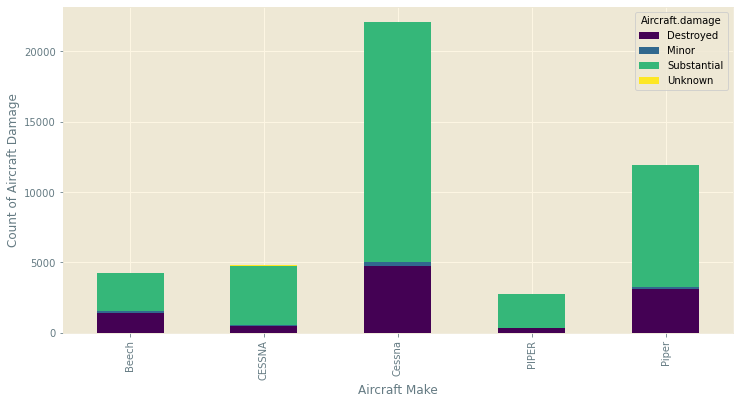

In [98]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
damage_count.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
bar_chart_title= 'Distribution of Aircraft Damage per Make'

# Labels
plt.xlabel('Aircraft Make')
plt.ylabel('Count of Aircraft Damage')
plt.title(bar_chart_title)
plt.legend(title="Damage Type")
plt.xticks(rotation=45)

plt.show()



In [ ]:
#QUESTION 2 
#WHICH AIRCRAFT IS THE LOWEST RISK FOR THE COMPANY
#I'll use occupants accidents severity and survivability to answer this question
# we'll need the aircraft damage,total fatal injuries and make for the aircrafts

In [183]:
# Selecting relevant columns
injury_outcomes = df[['Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].copy()
injury_outcomes


,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,Stinson,2.0,0.0,0.0
1,Piper,4.0,0.0,0.0
2,Cessna,3.0,NaN,NaN
3,Rockwell,2.0,0.0,0.0
4,Cessna,1.0,2.0,NaN
...,...,...,...,...
88884,PIPER,0.0,1.0,0.0
88885,BELLANCA,0.0,0.0,0.0
88886,AMERICAN CHAMPION AIRCRAFT,0.0,0.0,0.0
88887,CESSNA,0.0,0.0,0.0


In [184]:
injury_outcomes.dropna(inplace=True)

Let's visualize the distribution of injury outcomes vs the aircraft make 

In [185]:
injury_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74373 entries, 0 to 88888
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    74373 non-null  object 
 1   Total.Fatal.Injuries    74373 non-null  float64
 2   Total.Serious.Injuries  74373 non-null  float64
 3   Total.Minor.Injuries    74373 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.8+ MB


In [ ]:
#tot_series= injury_outcomes['Total.Fatal.Injuries'].value_counts()
#tot_fatalities= list(tot_series)
#len(tot_fatalities)

97

In [ ]:
#serious_series= injury_outcomes['Total.Serious.Injuries'].value_counts()
#tot_serious_injuries= list(serious_series)



In [ ]:
#minor_series= injury_outcomes['Total.Minor.Injuries'].value_counts()
#tot_minor_injuries= list(minor_series)

In [201]:
#plt.figure(figsize=(10,6))

#scatter plots
#plt.scatter(injury_outcomes['Total.Fatal.Injuries'],injury_outcomes['Make'], 
            color='red', label='Fatal Injuries', alpha=0.6)
#plt.scatter(injury_outcomes['Total.Serious.Injuries'], injury_outcomes['Make'], 
            color='orange', label='Serious Injuries', alpha=0.6)
#plt.scatter( injury_outcomes['Total.Minor.Injuries'],injury_outcomes['Make'], 
            color='green', label='Minor Injuries', alpha=0.6)

#labels and titles 


#plt.xlabel("Aircraft Make")
#plt.ylabel("Number of Injuries")
#plt.title("Aircraft Injury Distribution by Make")
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#plt.legend();

IndentationError: unexpected indent (<ipython-input-201-45380b8ee011>, line 5)

QUESTION 1: ACCIDENTS' OUTCOME AND SEVERITY TRENDS ACROSS THE YEARS 
We'll use the event date, injury outcomes and injury severity columns 
1. Accidents' severity trends

In [213]:
df['Event.Date']= pd.to_datetime(df['Event.Date'])
df['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

In [206]:
accidents_severity= df[['Event.Date', 'Injury.Severity']].copy()
accidents_severity


,Event.Date,Injury.Severity
0,1948-10-24,Fatal(2)
1,1962-07-19,Fatal(4)
2,1974-08-30,Fatal(3)
3,1977-06-19,Fatal(2)
4,1979-08-02,Fatal(1)
...,...,...
88884,2022-12-26,Minor
88885,2022-12-26,NaN
88886,2022-12-26,Non-Fatal
88887,2022-12-26,NaN


In [216]:
accidents_severity['Injury.Severity'].dropna(inplace=True)

In [217]:
accidents_severity

,Event.Date,Injury.Severity
0,1948-10-24,Fatal(2)
1,1962-07-19,Fatal(4)
2,1974-08-30,Fatal(3)
3,1977-06-19,Fatal(2)
4,1979-08-02,Fatal(1)
...,...,...
88884,2022-12-26,Minor
88885,2022-12-26,NaN
88886,2022-12-26,Non-Fatal
88887,2022-12-26,NaN


In [ ]:
###VISUALIZATION 

Occupants survivability trends

In [220]:
survivability_df= df[['Event.Date','Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries' ]].copy()
survivability_df

,Event.Date,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,1948-10-24,2.0,0.0,0.0
1,1962-07-19,4.0,0.0,0.0
2,1974-08-30,3.0,NaN,NaN
3,1977-06-19,2.0,0.0,0.0
4,1979-08-02,1.0,2.0,NaN
...,...,...,...,...
88884,2022-12-26,0.0,1.0,0.0
88885,2022-12-26,0.0,0.0,0.0
88886,2022-12-26,0.0,0.0,0.0
88887,2022-12-26,0.0,0.0,0.0
